In [34]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

rc('font', family='Malgun Gothic')
rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

plt.style.use('ggplot')

In [6]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 26D6-64DD

 C:\Users\한대연\Desktop\코딩\Analysis 디렉터리

2020-04-19  오후 07:21    <DIR>          .
2020-04-19  오후 07:21    <DIR>          ..
2020-04-19  오후 07:13    <DIR>          .ipynb_checkpoints
2020-04-19  오후 07:17    <DIR>          bike-sharing-demand
2020-04-19  오후 07:16           193,828 bike-sharing-demand.zip
2019-09-21  오전 04:46             1,877 conversionRates.csv
2020-04-16  오후 10:12            23,642 dsschool_youtube_live.ipynb
2019-09-21  오전 04:46         4,303,670 freeformResponses.csv
2020-03-21  오후 11:46           512,315 inflearn-event.csv
2020-03-21  오후 11:48           726,421 inflearn-event.ipynb
2020-04-19  오후 06:35           284,483 kaggle_survey.ipynb
2020-03-29  오후 09:00         3,692,241 kaggle-survey-2017.zip
2020-03-09  오후 03:08           586,384 markdown_subin.zip
2019-09-21  오전 04:46        24,876,561 multipleChoiceResponses.csv
2020-03-28  오후 07:33               930 README.md
2019-09-21  오전 04:46             1,032 RespondentTy

In [10]:
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
train.shape

(10886, 12)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
train['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [17]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

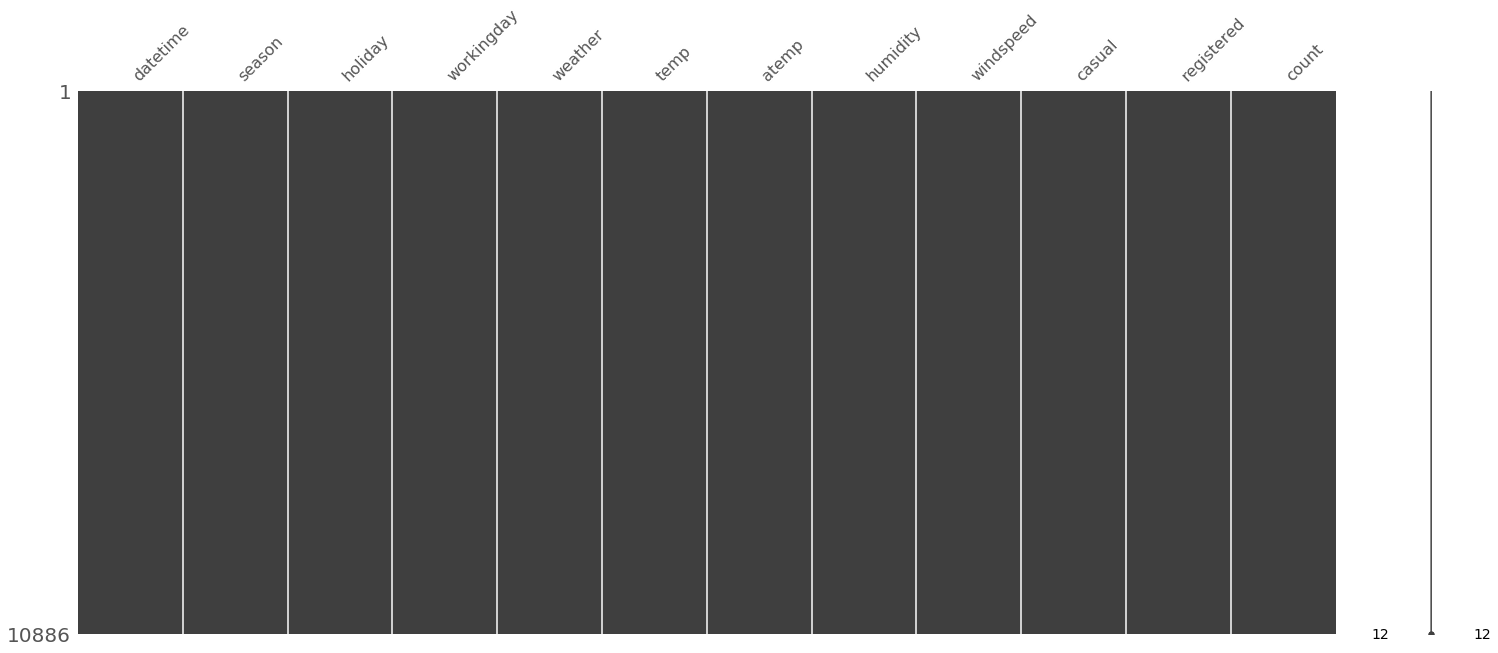

In [18]:
import missingno as msno
msno.matrix(train)

In [27]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

In [28]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

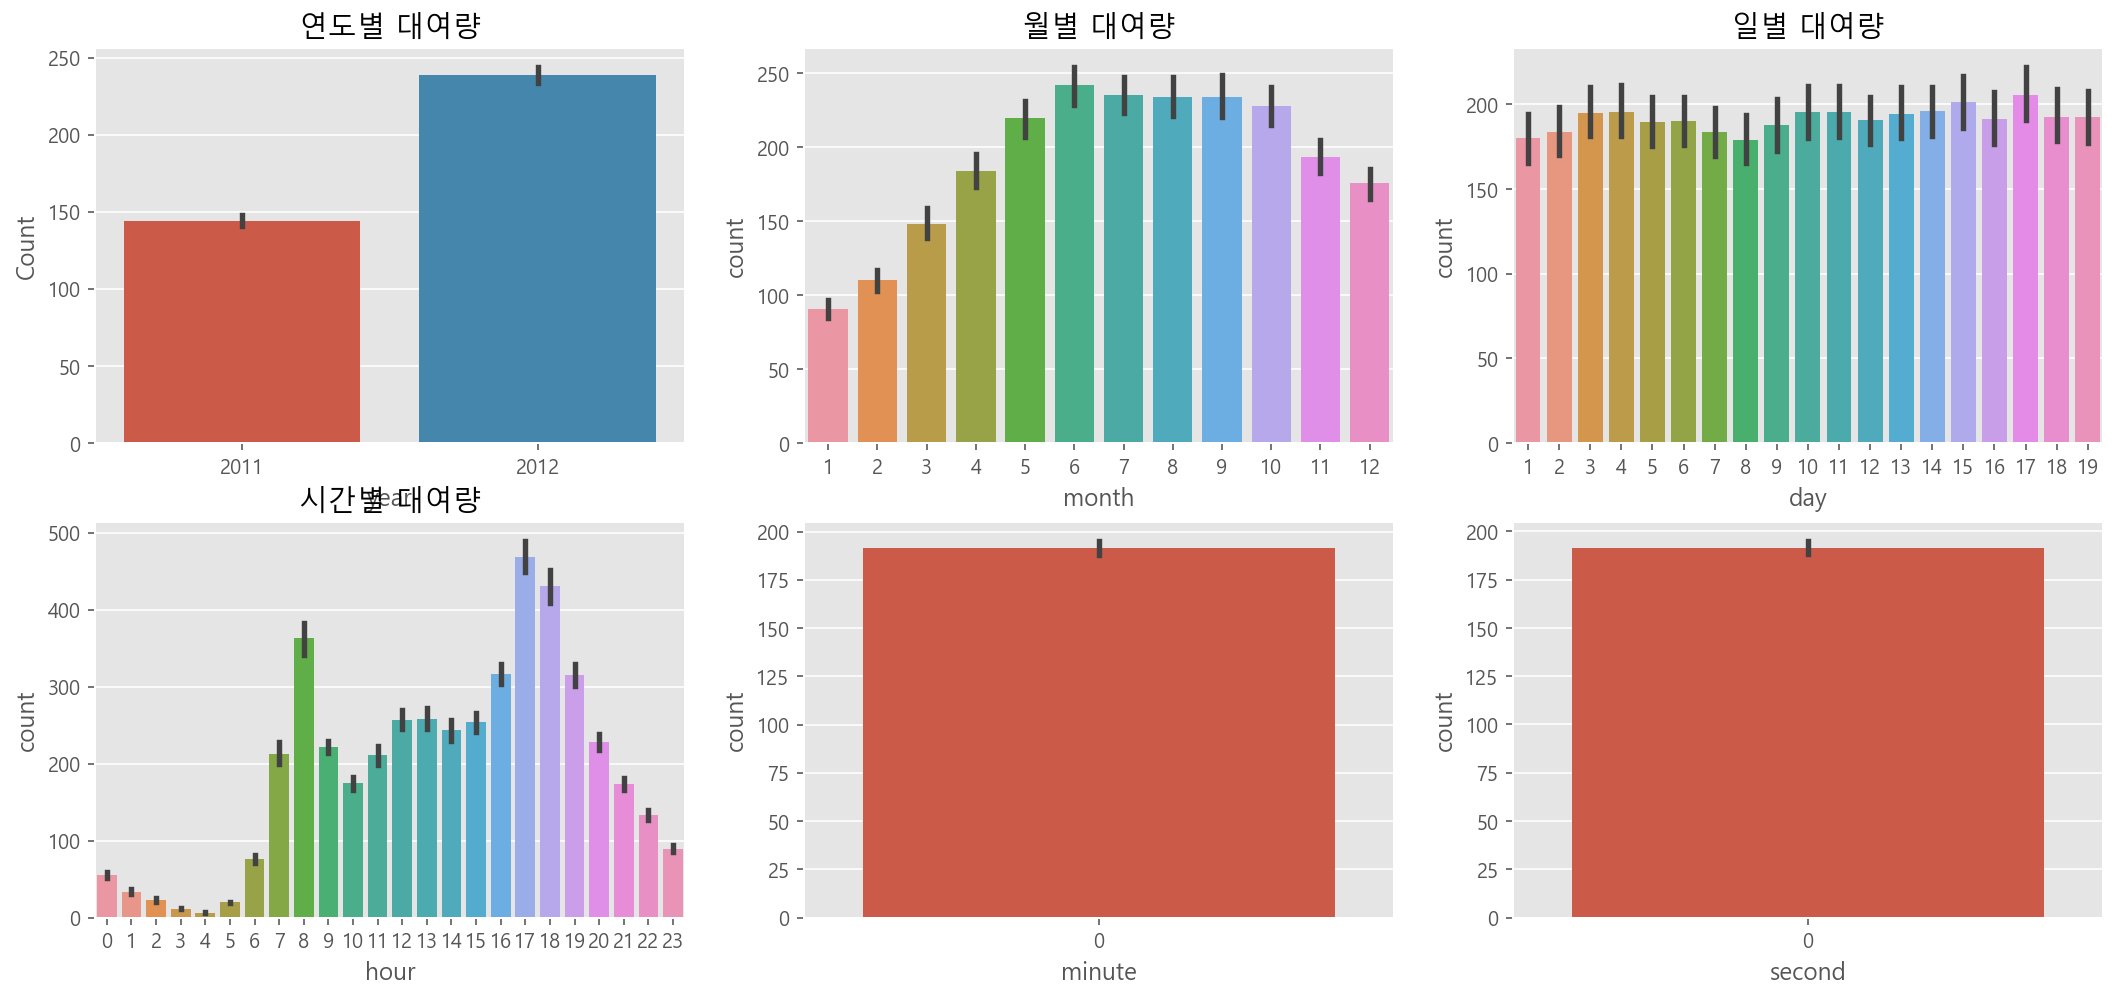

In [35]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data= train, x = 'year', y='count', ax=ax1)
sns.barplot(data= train, x = 'month', y='count', ax=ax2)
sns.barplot(data= train, x = 'day', y='count', ax=ax3)
sns.barplot(data= train, x = 'hour', y='count', ax=ax4)
sns.barplot(data= train, x = 'minute', y='count', ax=ax5)
sns.barplot(data= train, x = 'second', y='count', ax=ax6)

ax1.set(ylabel = 'Count', title = "연도별 대여량")
ax2.set(xlabel = 'month', title = "월별 대여량")
ax3.set(xlabel = 'day', title = "일별 대여량")
ax4.set(xlabel = 'hour', title = "시간별 대여량")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

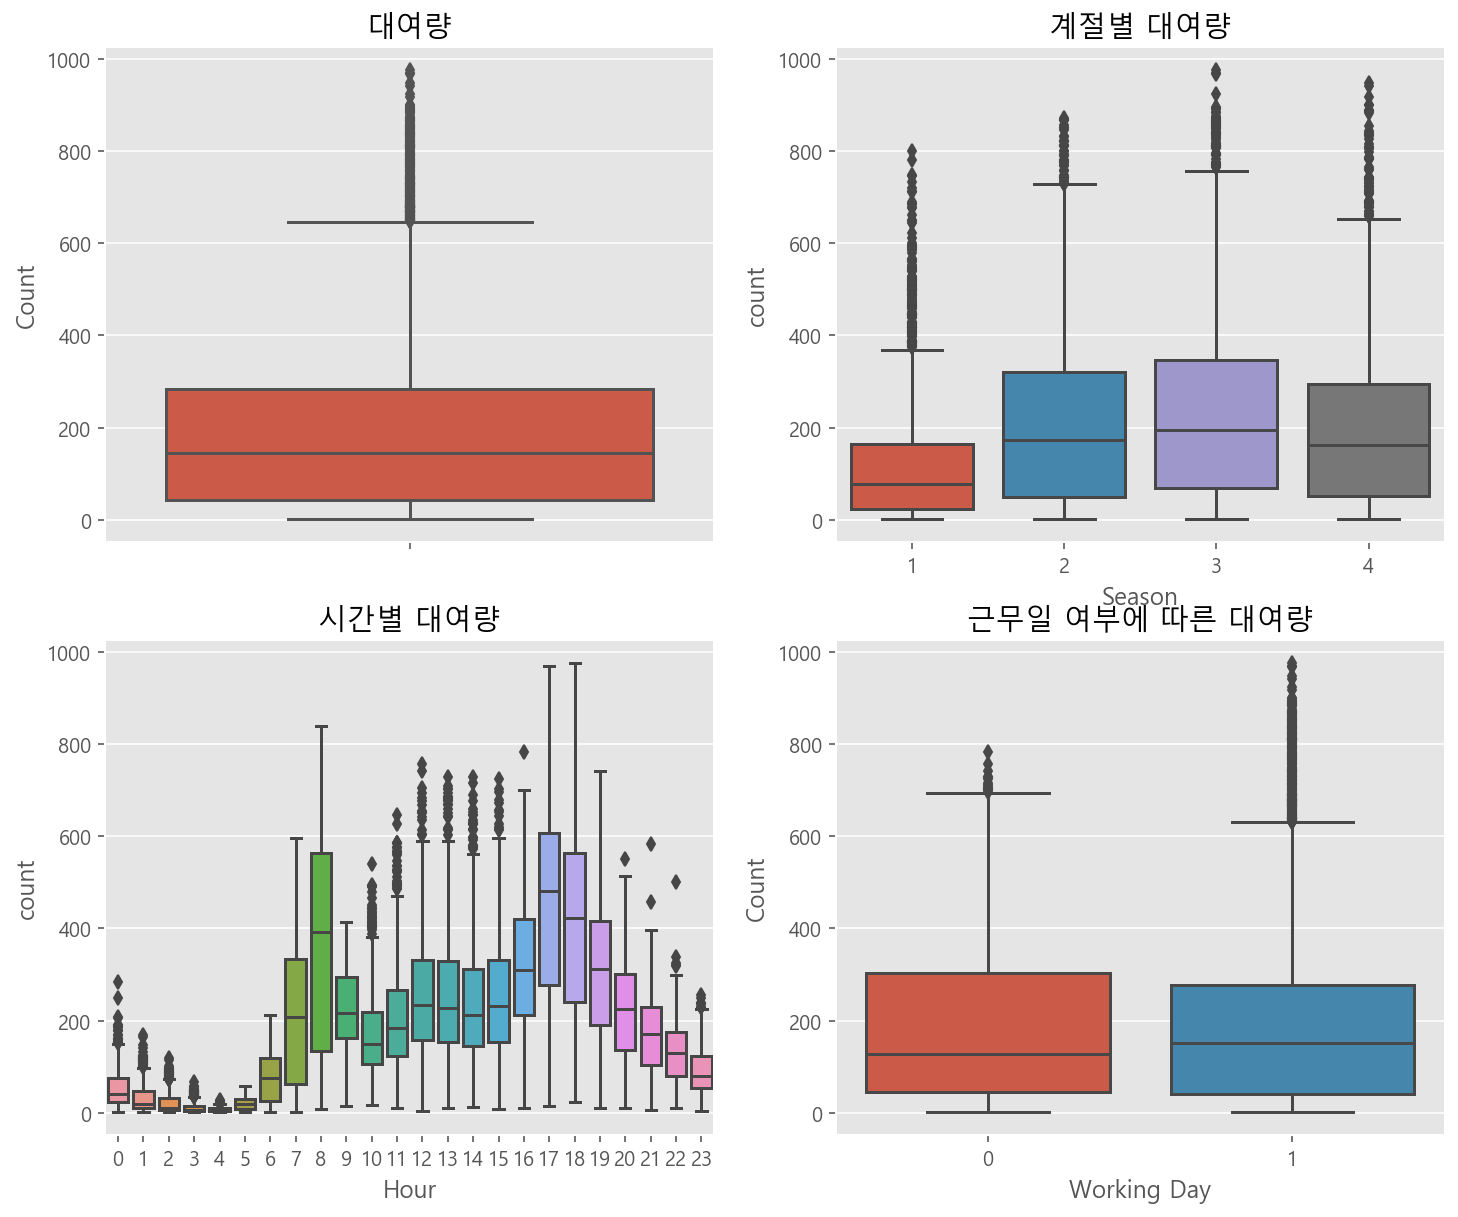

In [53]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data = train, y = "count", orient = "v", ax=axes[0][0])
sns.boxplot(data = train,x='season', y = "count", orient = "v", ax=axes[0][1])
sns.boxplot(data = train,x='hour', y = "count", orient = "v", ax=axes[1][0])
sns.boxplot(data = train,x='workingday', y = "count", orient = "v", ax=axes[1][1])

axes[0][0].set(ylabel = 'Count', title = "대여량")
axes[0][1].set(xlabel = 'Season', ylabel = "count", title ="계절별 대여량")
axes[1][0].set(xlabel = 'Hour', ylabel = 'count', title = '시간별 대여량')
axes[1][1].set(xlabel = 'Working Day', ylabel = 'Count', title = '근무일 여부에 따른 대여량')

In [54]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [56]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

[Text(0.5, 1.0, 'season')]

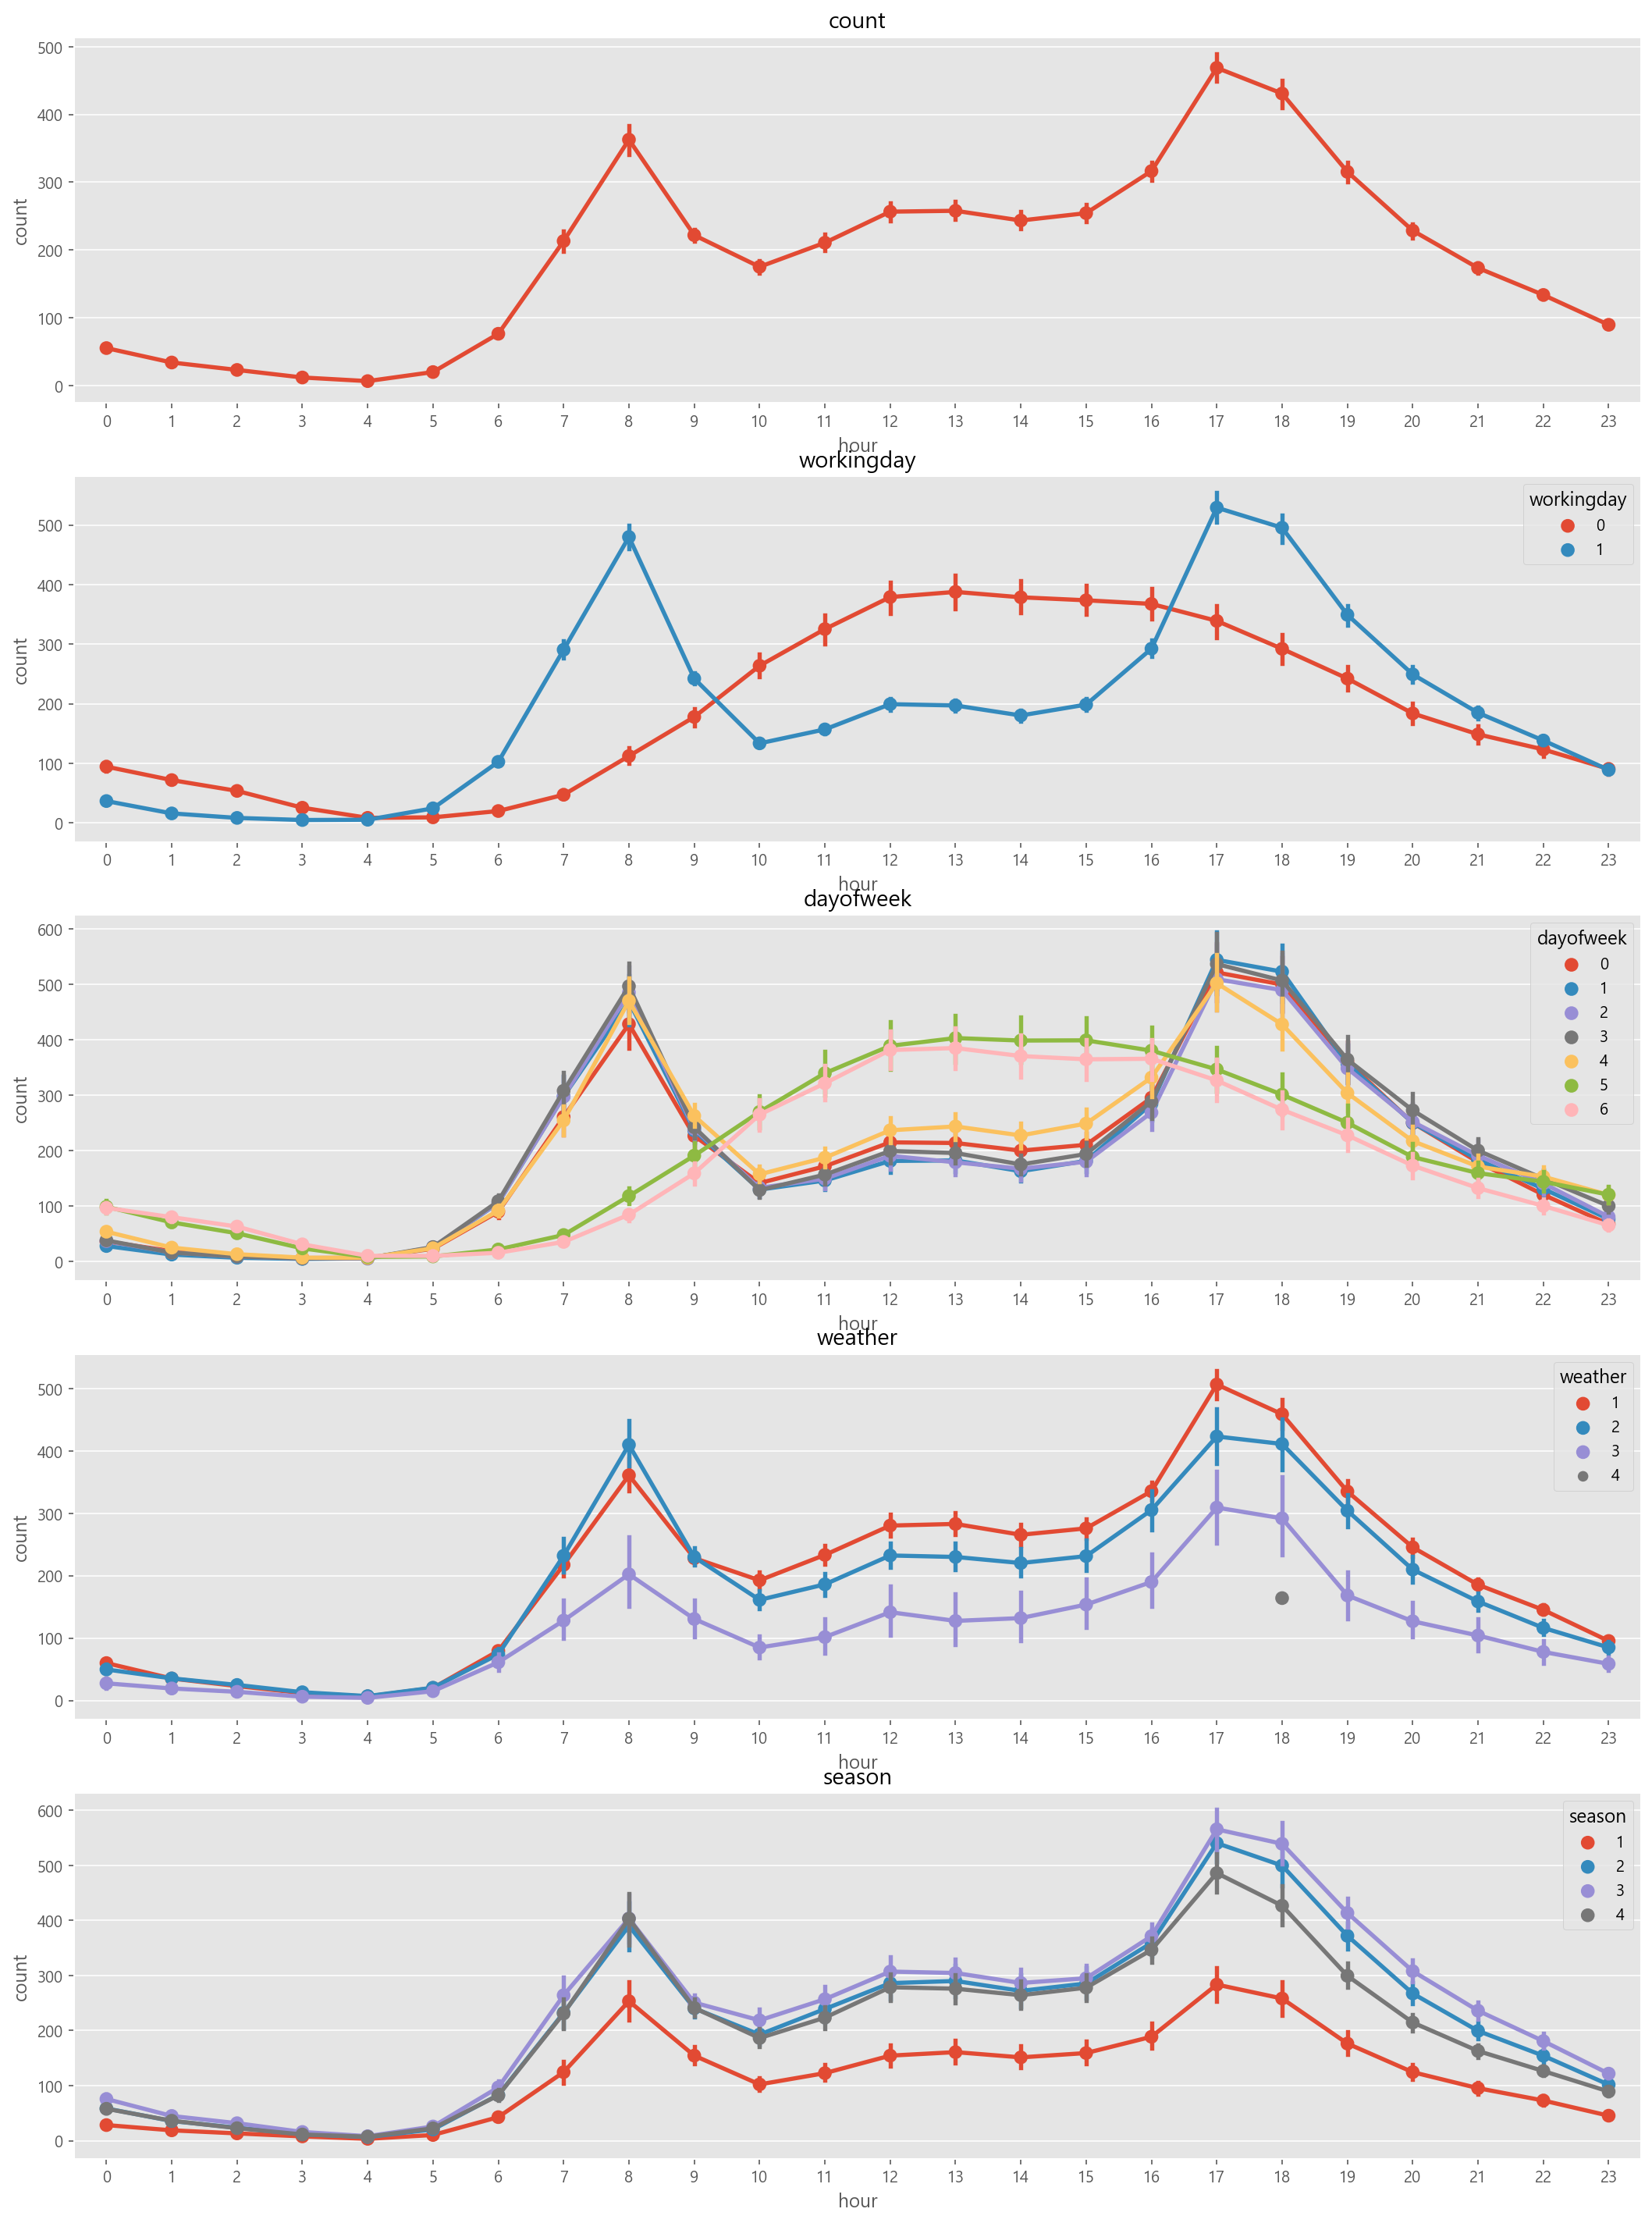

In [61]:
fig, (ax1, ax2, ax3,ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue = 'workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue= 'season', ax=ax5)

ax1.set(title = 'count')
ax2.set(title = 'workingday')
ax3.set(title = 'dayofweek')
ax4.set(title = 'weather')
ax5.set(title= 'season')

In [62]:
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


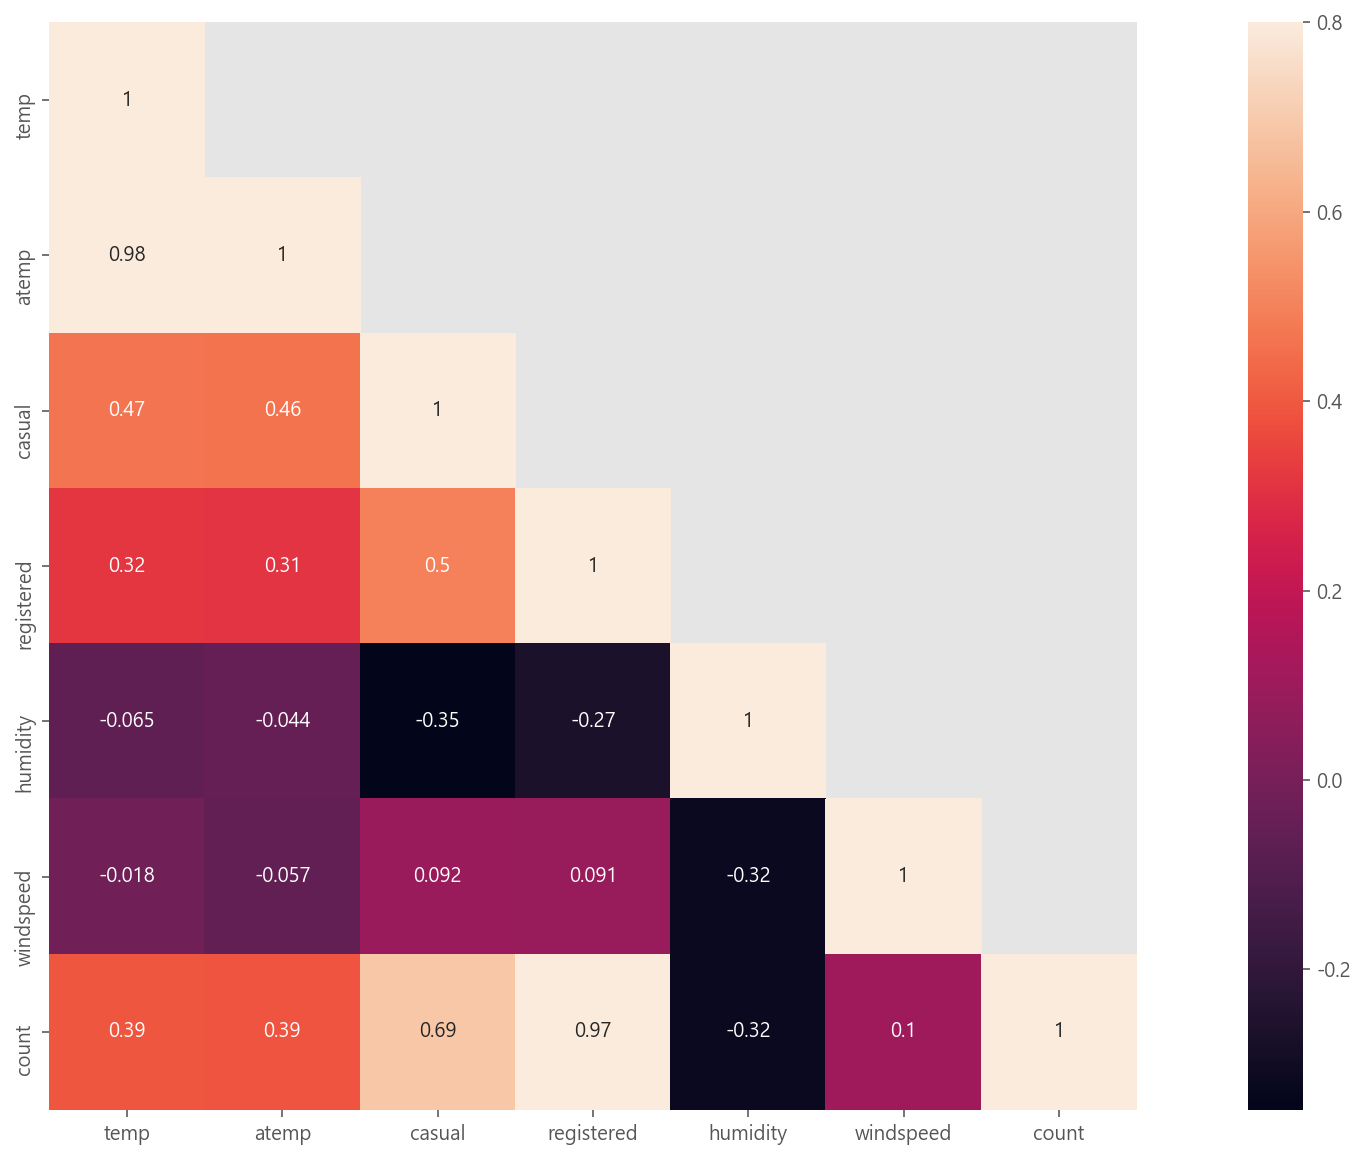

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot = True)

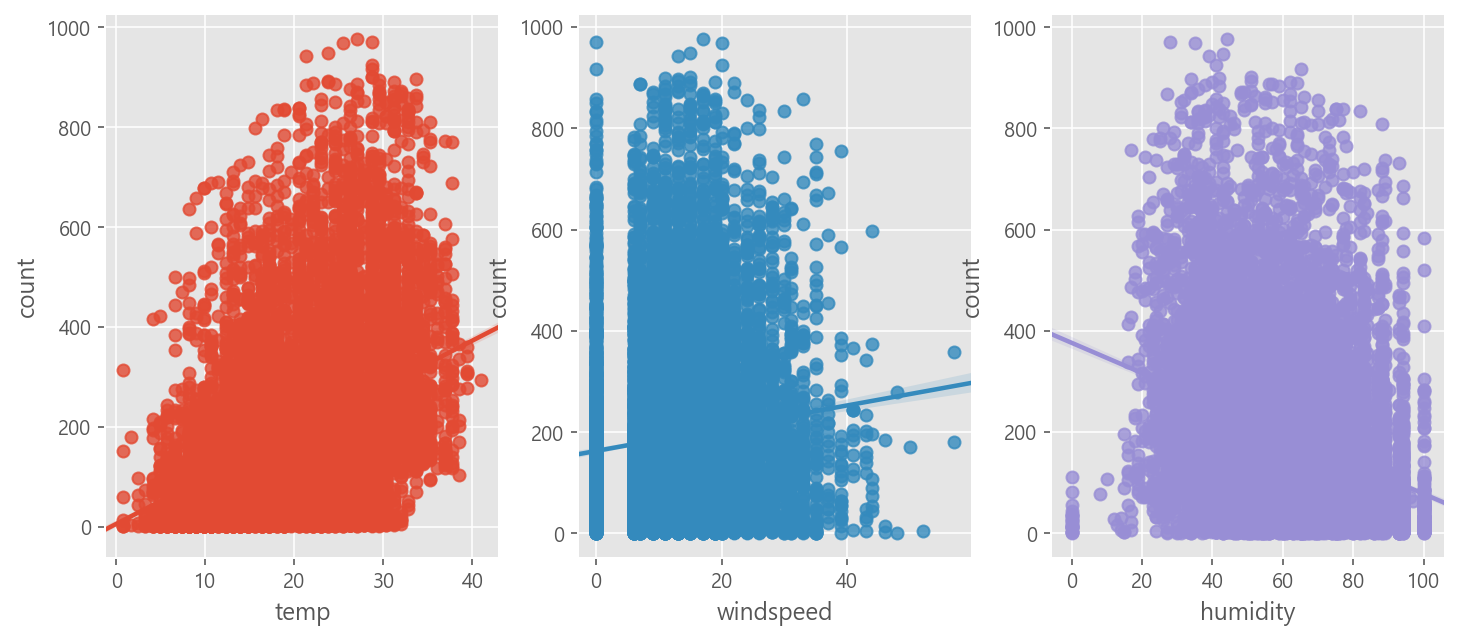

In [67]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12,5)

sns.regplot(x='temp', y='count', data = train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train,ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)

In [68]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


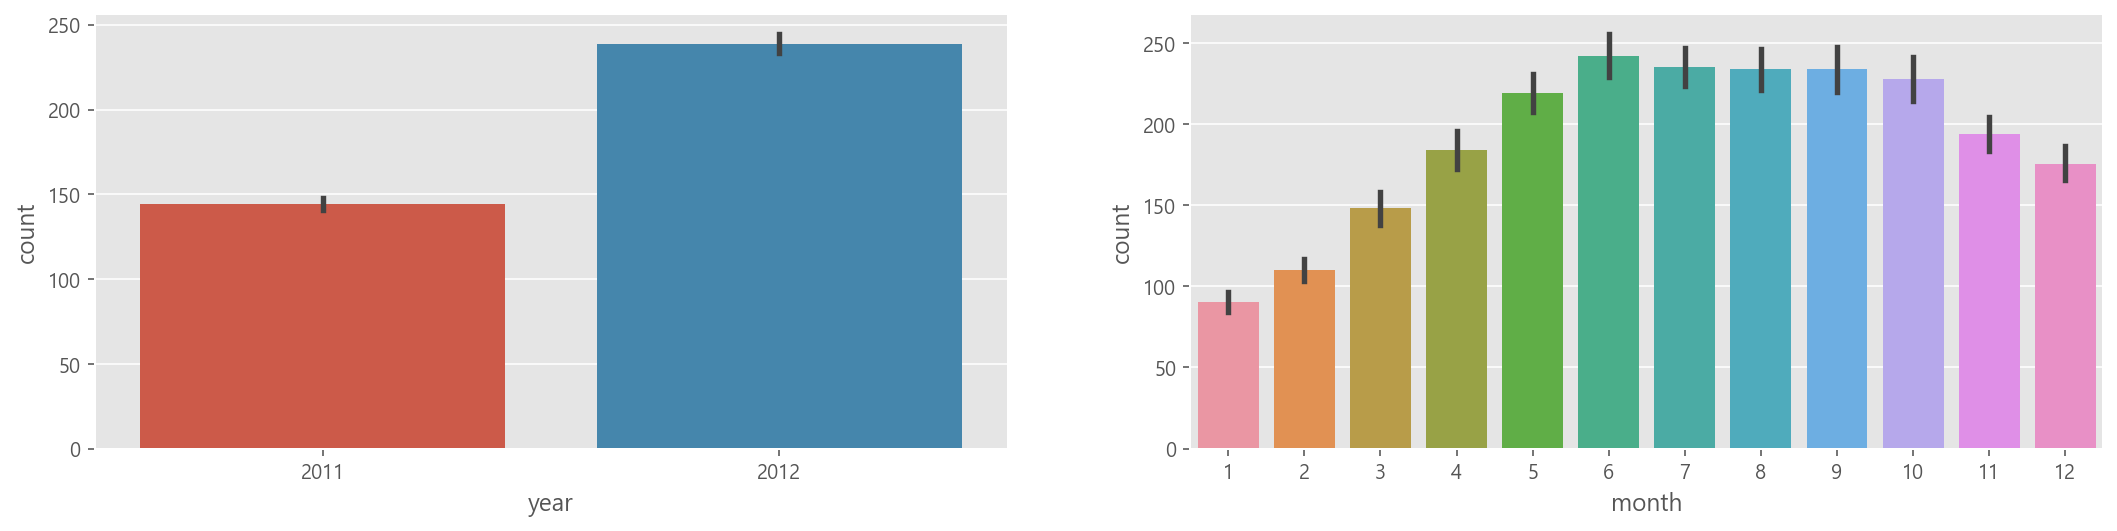

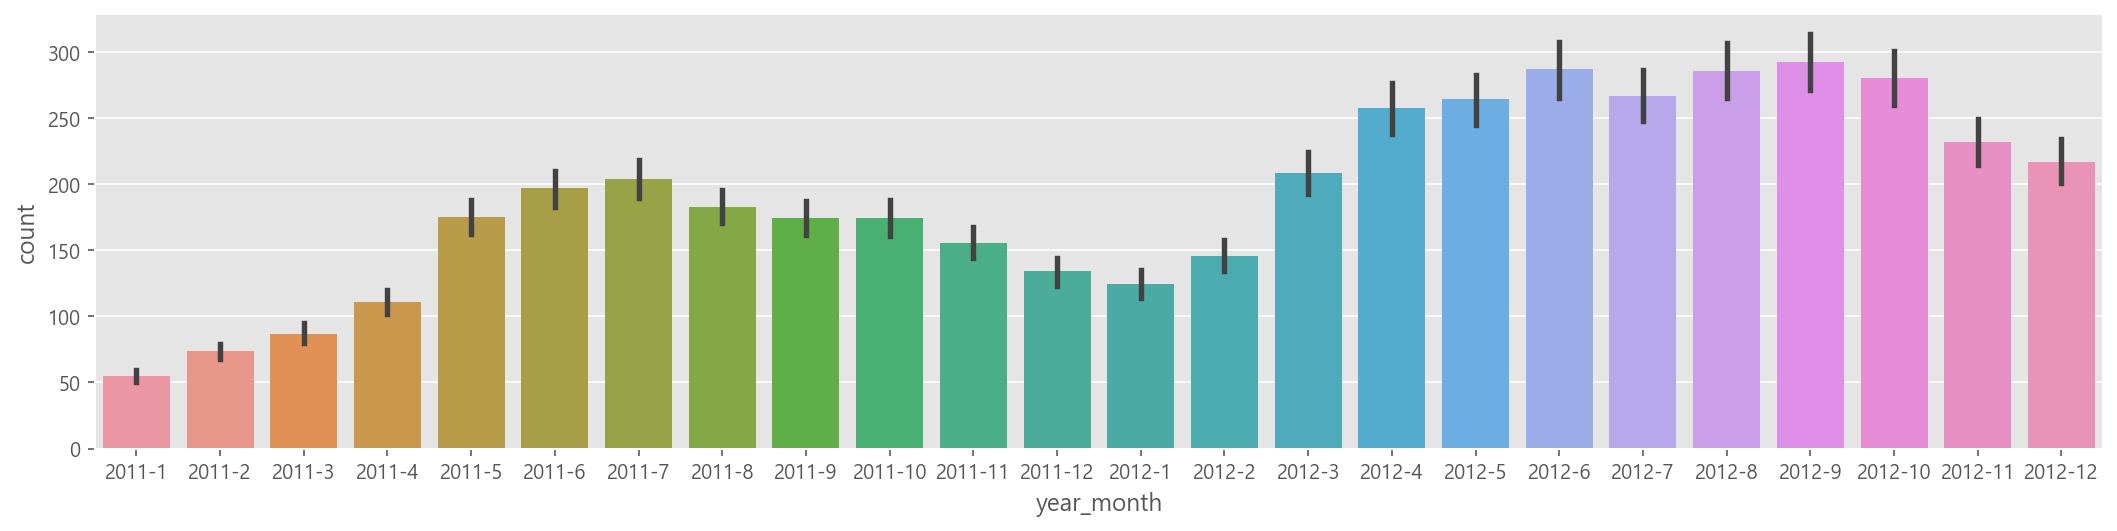

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols = 1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

In [78]:
# 아웃라이어 제거
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

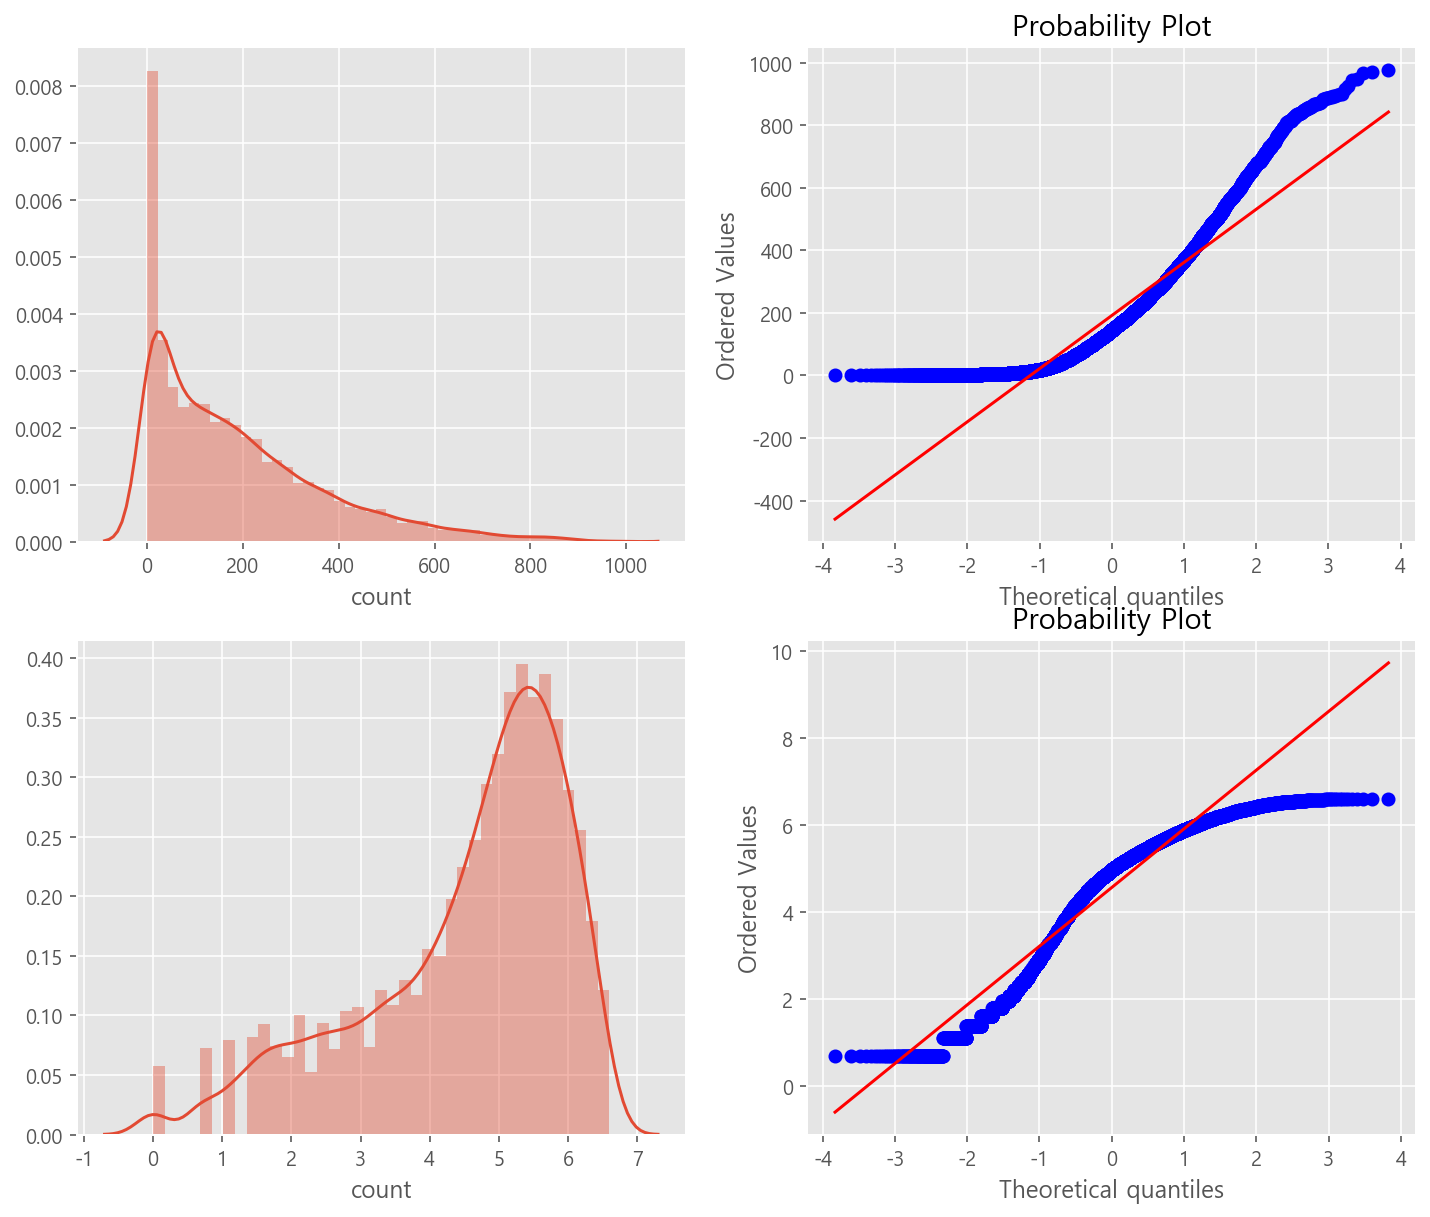

In [79]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers['count']), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist='norm', fit = True, plot=axes[1][1])